*Agenda:*
1. Data wrangling
2. Plotting
3. Exploratory data analysis

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

In [3]:
import pandas as pd, numpy as np

#### Reading the raw data

In [4]:
sales0 = pd.read_csv("superstore_sales.csv")

In [5]:
sales0.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010


In [6]:
sales0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
Order ID                8399 non-null int64
Order Date              8399 non-null object
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Discount                8399 non-null float64
Ship Mode               8399 non-null object
Profit                  8399 non-null float64
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null float64
Customer Name           8399 non-null object
Province                8399 non-null object
Region                  8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8399 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.2+ MB


# Univariate analysis

#### What are the percetages of each order 'Order Priority'?

In [6]:
sales0['Order Priority'].value_counts()

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order Priority, dtype: int64

In [7]:
sales0['Order Priority'].value_counts(normalize = True)

High             0.210501
Low              0.204786
Not Specified    0.199071
Medium           0.194190
Critical         0.191451
Name: Order Priority, dtype: float64

#### What are the percentages of 'Ship mode'?

In [8]:
sales0['Ship Mode'].value_counts(normalize=True)

Regular Air       0.746517
Delivery Truck    0.136445
Express Air       0.117038
Name: Ship Mode, dtype: float64

#### Which the most common customer segment, and least common?

In [9]:
sales0['Customer Segment'].value_counts(normalize=True)

Corporate         0.366234
Home Office       0.241934
Consumer          0.196333
Small Business    0.195499
Name: Customer Segment, dtype: float64

#### What are the values in 'Sales' like?

In [10]:
sales0.Sales.describe()

count     8399.000000
mean      1775.878179
std       3585.050525
min          2.240000
25%        143.195000
50%        449.420000
75%       1709.320000
max      89061.050000
Name: Sales, dtype: float64

In [11]:
sales0['Unit Price'].describe()

count    8399.000000
mean       89.346259
std       290.354383
min         0.990000
25%         6.480000
50%        20.990000
75%        85.990000
max      6783.020000
Name: Unit Price, dtype: float64

#### Task:   
For "Product Base Margin", get the numerical summary.  
Do you sense there are extreme values?

In [13]:
sales0['Product Base Margin'].describe()

count    8336.000000
mean        0.512513
std         0.135589
min         0.350000
25%         0.380000
50%         0.520000
75%         0.590000
max         0.850000
Name: Product Base Margin, dtype: float64

---
# Plotting in Python
---

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Histogram

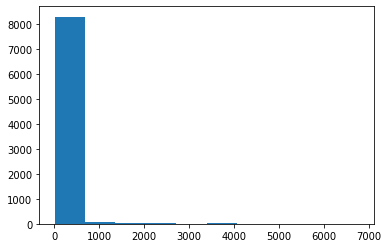

In [15]:
plt.hist(x = sales0['Unit Price'])
plt.show()

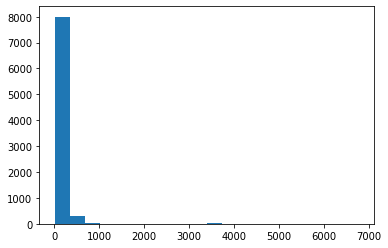

In [16]:
plt.hist(x = sales0['Unit Price'], bins = 20)
plt.show()

In [17]:
?plt.hist

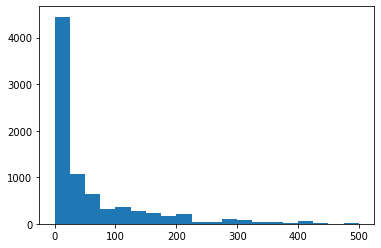

In [21]:
plt.hist(x = sales0['Unit Price'], bins = 20, range=(0,500))
plt.show()

### Box plot

In [25]:
sales0.isnull().sum()

Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Base Margin     63
Ship Date                0
dtype: int64

In [26]:
sales0.shape

(8399, 18)

In [27]:
sales1 = sales0.dropna(subset=['Product Base Margin'])

In [28]:
sales1.shape

(8336, 18)

<img src="https://discourse-cloud-file-uploads.s3.dualstack.us-west-2.amazonaws.com/business6/uploads/analyticsvidhya/original/2X/d/d11281b44c2e440b36aaf29156b5032105d2d06b.png" width="320"
style="float: left;">

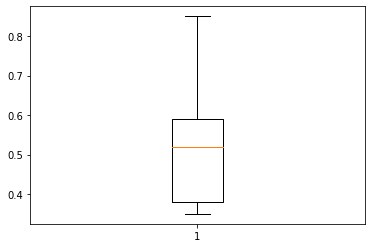

In [29]:
plt.boxplot(sales1['Product Base Margin'])
plt.show()

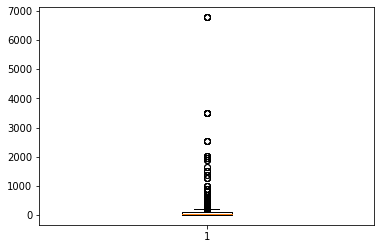

In [31]:
plt.boxplot(sales1['Unit Price'])
plt.show()

#### Let's examine the very high values

In [35]:
sales1[sales1['Unit Price'] > 4000]

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
3512,3073,07-01-2009,Medium,7,45923.76,0.07,Regular Air,102.61,6783.02,24.49,Jasper Cacioppo,Quebec,Quebec,Home Office,Technology,Office Machines,0.39,08-01-2009
4674,29766,21-03-2009,Medium,13,89061.05,0.00,Regular Air,27220.69,6783.02,24.49,Emily Phan,New Brunswick,Atlantic,Consumer,Technology,Office Machines,0.39,22-03-2009
5861,30343,21-05-2012,Critical,8,41343.21,0.09,Regular Air,3852.19,6783.02,24.49,Craig Carreira,Saskachewan,Prarie,Corporate,Technology,Office Machines,0.39,23-05-2012
7571,21862,12-09-2010,Not Specified,4,19014.24,0.06,Regular Air,-10263.66,6783.02,24.49,Roger Demir,Alberta,West,Consumer,Technology,Office Machines,0.39,14-09-2010
7677,43044,17-10-2009,Medium,3,19707.20,0.04,Regular Air,-12558.00,6783.02,24.49,Laurel Workman,Alberta,West,Home Office,Technology,Office Machines,0.39,19-10-2009
7968,51553,27-11-2011,Not Specified,3,21366.51,0.00,Regular Air,-11984.40,6783.02,24.49,Adrian Barton,Alberta,West,Small Business,Technology,Office Machines,0.39,28-11-2011
8313,37095,10-03-2009,Low,3,18888.00,0.09,Regular Air,-14140.70,6783.02,24.49,Roy Phan,Alberta,West,Consumer,Technology,Office Machines,0.39,14-03-2009


### High values/ outliers
1. Identification - 
    - several approaches 
    - IQR based approach is one of many - **recommended first approach**
    - k-sigma approach - commonly used, but use judiciously
    - MAD based (median absolute deviation)
2. Dealing - 
    - these could be genuine values, and reliable
    - "DEPENDS" on the task at hand
    - drop these records ONLY if you are sure you don't want them to influence your task at hand

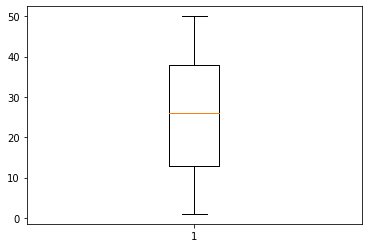

In [38]:
plt.boxplot(sales1['Order Quantity'])
plt.show()

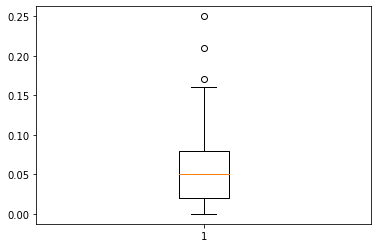

In [39]:
plt.boxplot(sales1['Discount'])
plt.show()

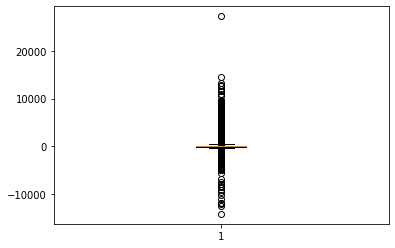

In [42]:
plt.boxplot(sales1['Profit'])
plt.show()

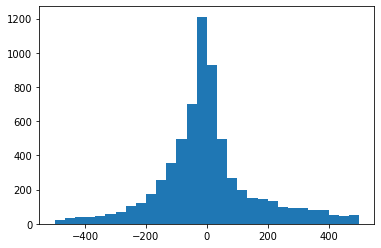

In [50]:
plt.hist(sales1.Profit, bins=30, range=(-500, 500))
plt.show()

### Visual analysis of categorical variables

In [55]:
print(sales0.columns)

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')


In [59]:
sales1['Ship Mode'].value_counts()

Regular Air       6233
Delivery Truck    1130
Express Air        973
Name: Ship Mode, dtype: int64

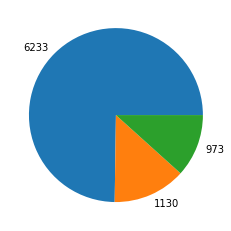

In [66]:
plt.pie(sales1['Ship Mode'].value_counts(),labels=sales1['Ship Mode'].value_counts().values)
plt.show()

#### We'll use bar charts

In [68]:
freqs = sales1['Ship Mode'].value_counts()

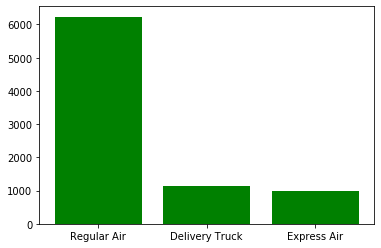

In [85]:
plt.bar(freqs.index, freqs.values, color="green")
plt.show()

#### Use pandas series plot method

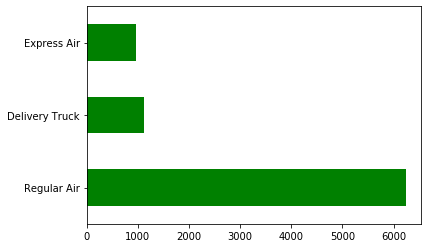

In [86]:
sales1['Ship Mode'].value_counts().plot.barh(color="green")
plt.show()

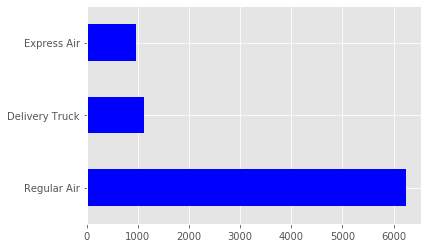

In [94]:
plt.style.use("ggplot")
sales1['Ship Mode'].value_counts().plot.barh(color="blue")
plt.show()

In [95]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

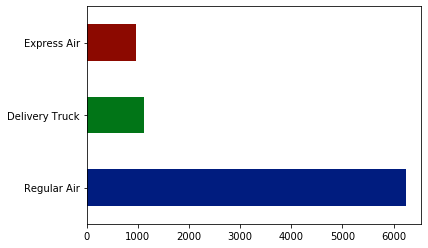

In [98]:
plt.style.use("seaborn-dark-palette")
%matplotlib inline
sales1['Ship Mode'].value_counts().plot.barh()
plt.show()

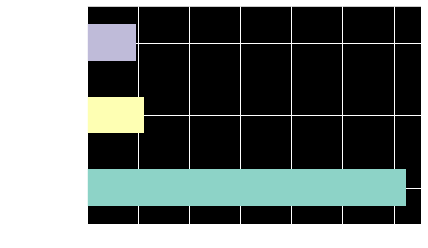

In [100]:
plt.style.use("dark_background")
%matplotlib inline
sales1['Ship Mode'].value_counts().plot.barh()
plt.show()

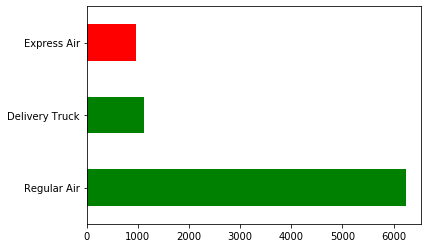

In [105]:
plt.style.use("default")
%matplotlib inline
sales1['Ship Mode'].value_counts().plot.barh(color=["green", "green", "red"])
plt.show()

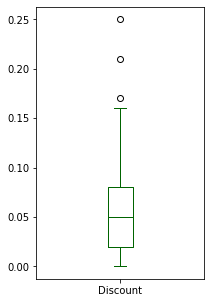

In [115]:
plt.figure(figsize=[3,5])
sales1.Discount.plot.box(color="darkgreen")
plt.show()

# Bi-variate analysis

### Scatter plot

<img src="https://upload.wikimedia.org/wikipedia/commons/a/af/Scatter_diagram_for_quality_characteristic_XXX.svg" width=400>

Gives us the relationship between the two features (ideally both numerical)

In [117]:
sales1.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

Product base margin vs. Unit price

In [124]:
sales1['Unit Price'].describe()

count    8336.000000
mean       88.716087
std       291.195650
min         0.990000
25%         6.480000
50%        20.980000
75%        85.990000
max      6783.020000
Name: Unit Price, dtype: float64

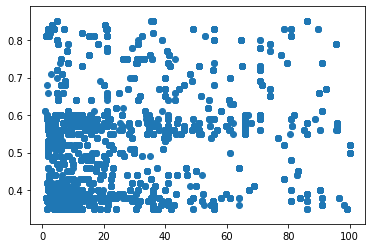

In [125]:
plt.scatter(x='Unit Price', y='Product Base Margin', data = sales1[sales1['Unit Price']<100])
plt.show()

In [138]:
?plt.hlines

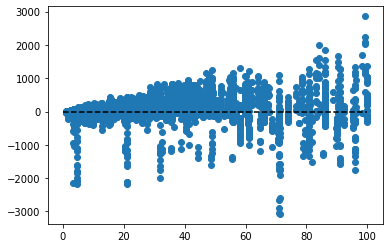

In [140]:
plt.scatter(x='Unit Price', y='Profit', data = sales1[sales1['Unit Price']<100])
plt.hlines(y=0, xmin=0,xmax=100, linestyles ="dashed")
plt.show()

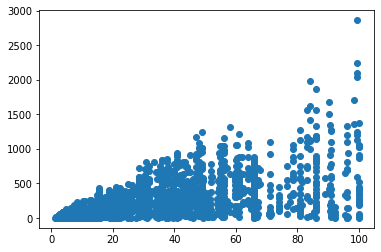

In [135]:
plt.scatter(x='Unit Price', y='Profit', data = sales1[(sales1['Unit Price']<100) & (sales1['Profit']>0)])
plt.show()

#### Avg. sales for different ship modes - plot them on a chart

In [141]:
sales1.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

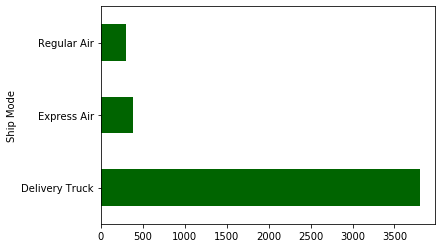

In [150]:
sales1.groupby(['Ship Mode'])['Sales'].median().plot.barh(color="darkgreen")
plt.show()